In [2]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns

sns.set()

Populating the interactive namespace from numpy and matplotlib


In [4]:
datafile = 'Ames_Housing_Data.tsv'
df = pd.read_csv(datafile,sep = '\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [29]:
print(df.shape)
df.loc[df['Gr Liv Area'] <= 4000,:]
print(df.shape)
data = df.copy()

(2930, 82)
(2930, 82)


In [30]:
## drop id colnms
print(data.shape)
len(data['PID']),len(data['Order'])

(2930, 82)


(2930, 2930)

In [31]:
data = data.drop(['PID','Order'],axis=1)

In [32]:
######## Log tranformations fr skewed values ###############
num_cols = data.select_dtypes('number').columns
skew_limit = 0.75
skew_vals = data.skew() # or data[num_cols].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False).index
skew_cols

Index(['Misc Val', 'Pool Area', 'Lot Area', 'Low Qual Fin SF', '3Ssn Porch',
       'Kitchen AbvGr', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch',
       'Bsmt Half Bath', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF',
       'SalePrice', 'Lot Frontage', '1st Flr SF', 'BsmtFin SF 1',
       'MS SubClass', 'Gr Liv Area', 'Total Bsmt SF', 'Bsmt Unf SF',
       '2nd Flr SF', 'TotRms AbvGrd'],
      dtype='object')

[Text(0.5, 0, '-0.01')]

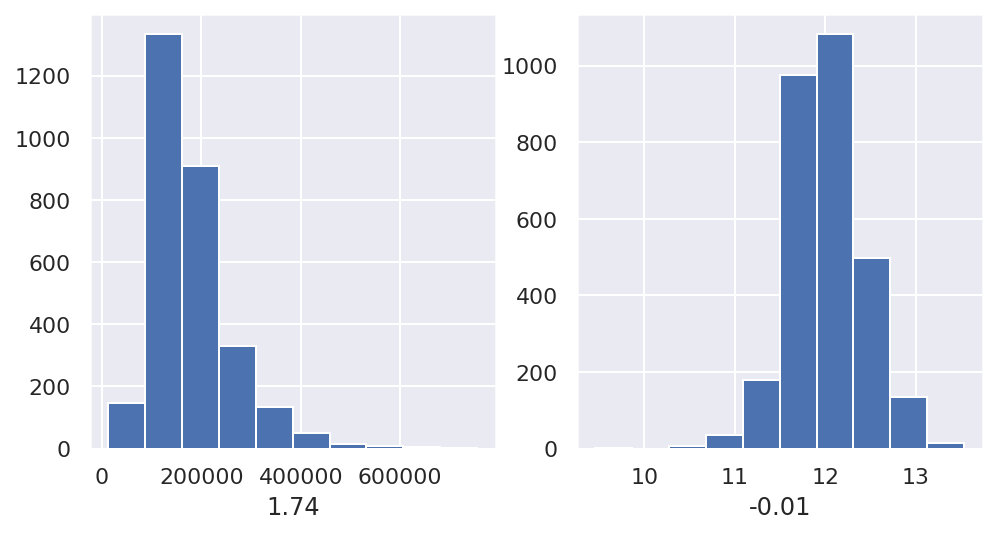

In [33]:
field = 'SalePrice'
fig,(ax_before,ax_after) = plt.subplots(1,2,figsize = (8,4))
data[field].hist(ax = ax_before)
ax_before.set(xlabel = '{:.2f}'.format(data[field].skew()))

data[field].apply(np.log1p).hist(ax = ax_after)
ax_after.set(xlabel = '{:.2f}'.format(data[field].apply(np.log1p).skew()))

In [34]:
for col in skew_cols:
    val1 = (data[col].skew())
    data[col] = data[col].apply(np.log1p)
    print(col,val1,data[col].skew())

Misc Val 21.999787616218825 5.227531546783761
Pool Area 16.939142497338803 15.034641182759728
Lot Area 12.820898171092681 -0.4983345562430807
Low Qual Fin SF 12.118161563533523 8.578845503315437
3Ssn Porch 11.403794862216518 8.847032458394537
Kitchen AbvGr 4.313824595352703 3.5302185930736427
BsmtFin SF 2 4.139978473979118 2.4497141113604495
Enclosed Porch 4.014445674931346 1.9682872159471827
Screen Porch 3.957467321213884 2.95475202546273
Bsmt Half Bath 3.940795464335767 3.7836865461334153
Mas Vnr Area 2.606984784742485 0.5289985384764605
Open Porch SF 2.535385919205803 -0.04625842126689295
Wood Deck SF 1.8426780991633038 0.1542027603969732
SalePrice 1.7435000757376466 -0.014772659537224382
Lot Frontage 1.499067354883421 -0.8490281438090747
1st Flr SF 1.4694286403471462 0.06235601430701644
BsmtFin SF 1 1.416182206786989 -0.6222585526362842
MS SubClass 1.357579440916994 0.23813346604452162
Gr Liv Area 1.2741097164955077 0.016483798178874066
Total Bsmt SF 1.156204321548864 -4.9670888545

In [36]:
############# Removing Null values ###############
data.isnull().sum().sort_values()

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
Length: 80, dtype: int64

In [37]:
useful_cols = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars','SalePrice']
small_data = data.loc[:,useful_cols]
small_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   float64
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   float64
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2929 non-null   float64
 10  SalePrice       2930 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 251.9 KB


In [40]:
small_data.fillna(0,inplace = True)
small_data.isnull().sum()

Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
Garage Cars       0
SalePrice         0
dtype: int64

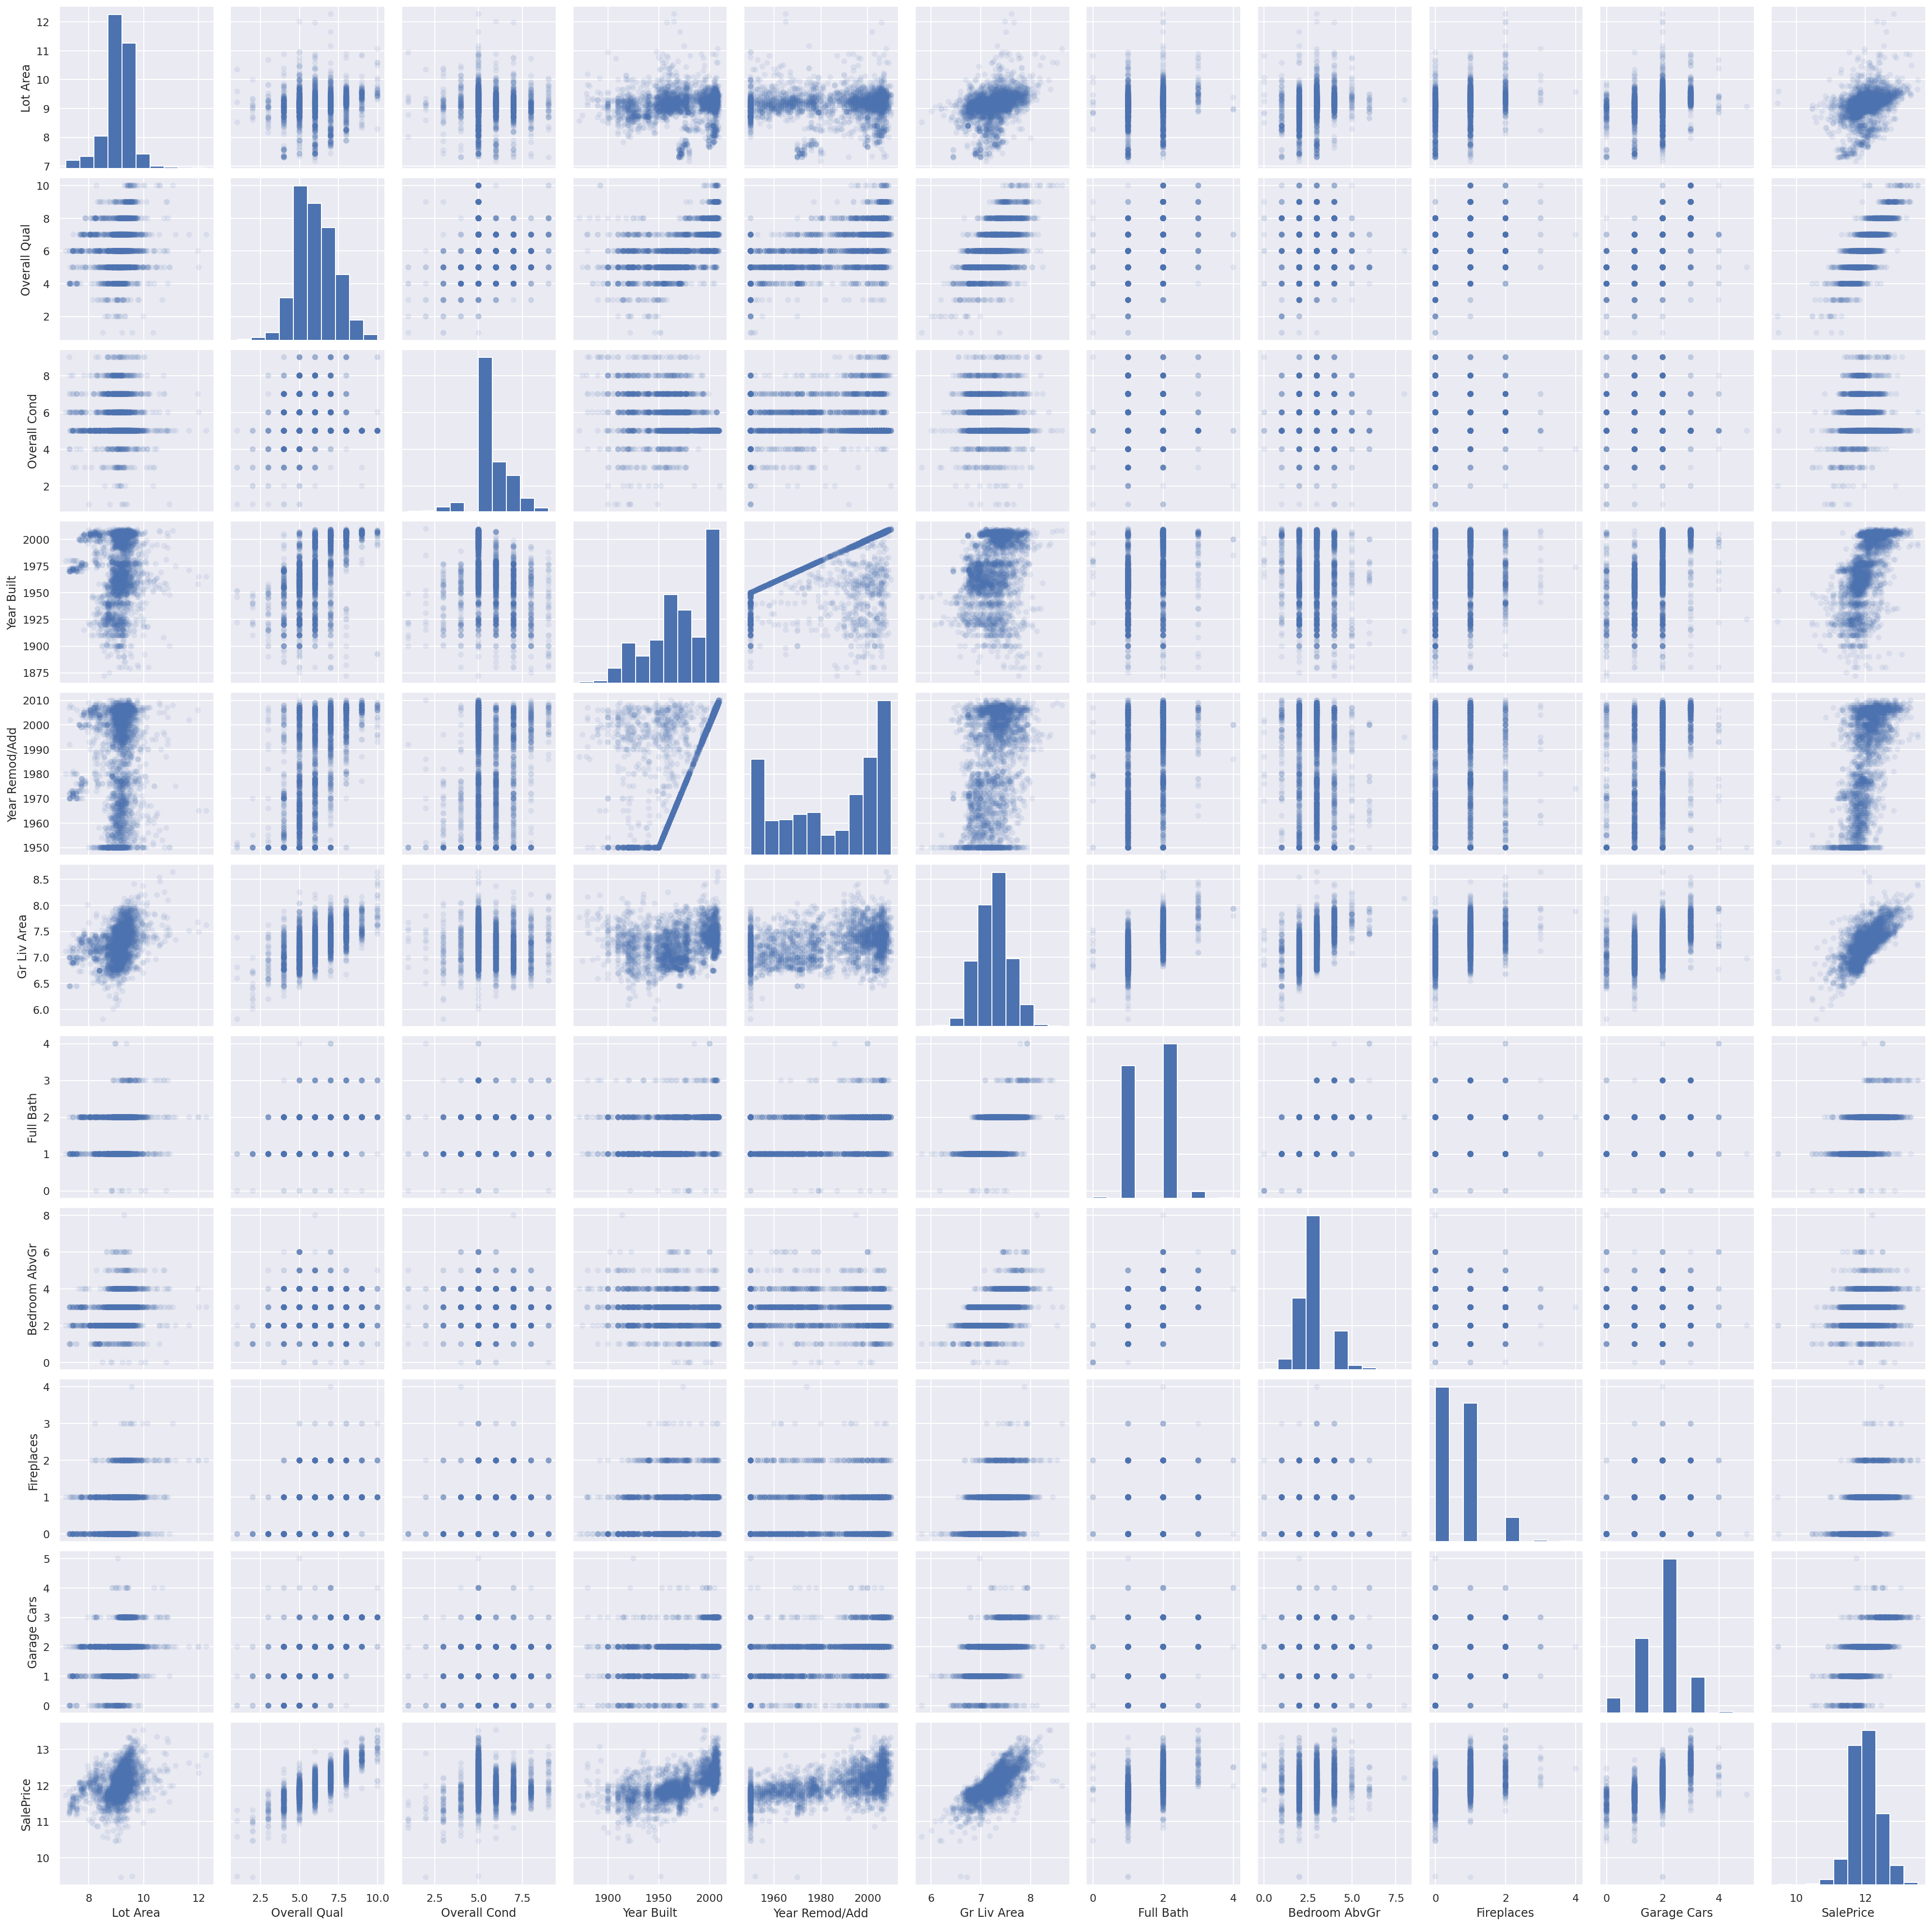

In [41]:
########### PairPlot to check for multicollinearity between variables #################
sns.pairplot(small_data,plot_kws = dict(alpha = 0.1,edgecolor = 'none'))

In [42]:
X = small_data.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars']]
Y = small_data['SalePrice']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   float64
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   float64
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 229.0 KB


In [44]:
################ Creating polynomial and non linear features #################
X['OQ2'] = data['Overall Qual'] ** 2
X['GLA2'] = data['Gr Liv Area'] ** 2
X['OQ_X_YB'] = data['Overall Qual'] * data['Year Built']
X['OQ_/_LA'] = data['Overall Qual'] / data['Lot Area']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   float64
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   float64
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  OQ2             2930 non-null   int64  
 11  GLA2            2930 non-null   float64
 12  OQ_X_YB         2930 non-null   int64  
 13  OQ_/_LA         2930 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 320.6 KB


In [50]:
###### One hot encoding for categorical features #########
X1 = X.copy()
X1['nbh'] = data['Neighborhood']
X1['hstyle'] = data['House Style']
X1.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,GLA2,OQ_X_YB,OQ_/_LA,nbh,hstyle
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,36,54.949070,11760,0.578798,NAmes,1Story
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,25,46.227161,9805,0.534146,NAmes,1Story
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,36,51.738303,11748,0.627236,NAmes,1Story
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,49,58.597755,13776,0.751058,NAmes,1Story
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,25,54.705776,9985,0.524402,Gilbert,2Story


In [56]:
nbh_counts = X1['nbh'].value_counts()
nbh_others = list(nbh_counts[nbh_counts <= 8].index)

In [57]:
X1['nbh'] = X1['nbh'].replace(nbh_others,'Other')
X1['nbh'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: nbh, dtype: int64

In [61]:
hstyle_counts = X1['hstyle'].value_counts()
hstyle_others = list(hstyle_counts[hstyle_counts <= 20].index)
print(hstyle_others)
X1['hstyle'] = X1['hstyle'].replace(hstyle_others,'Other')
X1['hstyle'].value_counts()

[]


1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
Other       27
2.5Unf      24
Name: hstyle, dtype: int64

In [70]:
X2 = X1.copy()
hstyle_cols = list(hstyle_counts.index)
X2[hstyle_cols[1:]] = pd.get_dummies(X1['hstyle'],drop_first = True)
X2.drop(['hstyle'],axis=1,inplace = True)
X2.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,...,GLA2,OQ_X_YB,OQ_/_LA,nbh,2Story,1.5Fin,SLvl,SFoyer,Other,2.5Unf
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,...,54.949070,11760,0.578798,NAmes,1,0,0,0,0,0
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,...,46.227161,9805,0.534146,NAmes,1,0,0,0,0,0
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,...,51.738303,11748,0.627236,NAmes,1,0,0,0,0,0
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,...,58.597755,13776,0.751058,NAmes,1,0,0,0,0,0
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,...,54.705776,9985,0.524402,Gilbert,0,0,1,0,0,0


In [74]:
def add_deviation_feat(df,category,feature):
    category_gb = df.groupby(category)[feature]
    category_mean = category_gb.transform(lambda x : x.mean())
    category_std = category_gb.transform(lambda x : x.std())
    
    dev_feat = (df[feature] - category_mean)/category_std
    df[category + '_DEV_' + feature] = dev_feat
    return df

In [75]:
X3 = add_deviation_feat(X2,'nbh','Overall Qual')
X3.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,...,OQ_X_YB,OQ_/_LA,nbh,2Story,1.5Fin,SLvl,SFoyer,Other,2.5Unf,nbh_DEV_Overall Qual
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,...,11760,0.578798,NAmes,1,0,0,0,0,0,0.857503
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,...,9805,0.534146,NAmes,1,0,0,0,0,0,-0.430205
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,...,11748,0.627236,NAmes,1,0,0,0,0,0,0.857503
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,...,13776,0.751058,NAmes,1,0,0,0,0,0,2.145211
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,...,9985,0.524402,Gilbert,0,0,1,0,0,0,-2.101974


In [76]:
#################### Creating Polynimial Feats with Sklearn ################
from sklearn.preprocessing import PolynomialFeatures

In [78]:
pf = PolynomialFeatures(degree=2)

In [79]:
feats = ['Overall Qual','Lot Area']
pf.fit(X3[feats])
pf.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [81]:
feat_array = pf.transform(X3[feats])
pd.DataFrame(feat_array,columns = pf.get_feature_names(input_features = feats))

,1,Overall Qual,Lot Area,Overall Qual^2,Overall Qual Lot Area,Lot Area^2
0,1.0,6.0,10.366309,36.0,62.197855,107.460366
1,1.0,5.0,9.360741,25.0,46.803706,87.623475
2,1.0,6.0,9.565775,36.0,57.394647,91.504043
3,1.0,7.0,9.320181,49.0,65.241266,86.865771
4,1.0,5.0,9.534668,25.0,47.673339,90.909889
...,...,...,...,...,...,...
2925,1.0,6.0,8.979417,36.0,53.876500,80.629923
2926,1.0,5.0,9.092232,25.0,45.461161,82.668688
2927,1.0,5.0,9.253591,25.0,46.267957,85.628954
2928,1.0,5.0,9.211440,25.0,46.057199,84.850623
